# Курсовой проект. Распознование изображений. Нейросеть на Keras.

Есть набор данных, на которых представленно 10 классов объектов. 
('airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship','truck')

Цель - обучить нейросеть на тренировочных картинках, и предсказать, что изображено на картинках тестового датасета. 

- Импорт встроенной датасета cifar10.
- Нормировка данных
- Построение модели keras.Sequential.
- Обучение нейросети на тренировочном сете.
- Проверка метрики accuracy
- Предсказание для тестового сета
- Визуализация.

In [1]:
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# импортируем датасет cifar10

cifar10 = keras.datasets.cifar10

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# размерности после разбиения
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [5]:
test_labels = test_labels.reshape(-1)
train_labels = train_labels.reshape(-1)

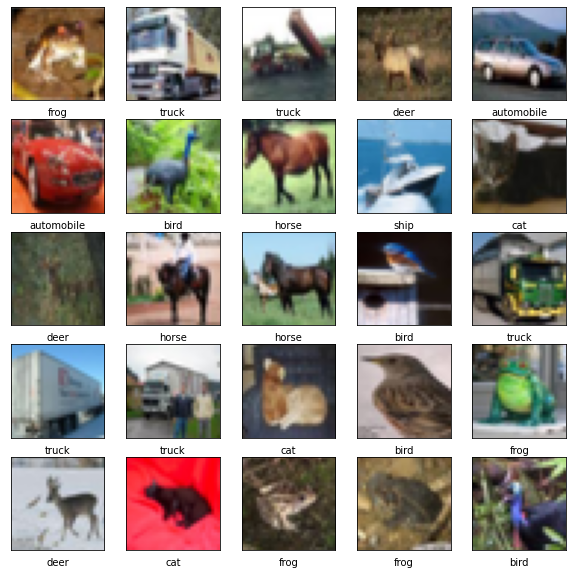

In [6]:
# первые 25 картинок тренировочного сета с лэйблами
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Построение модели

In [7]:
# максимальной значение ячейки
train_images.max()

255

In [8]:
# Нормировка данных
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# значения 3-х слоев цветов пикселя 0-й картинки(лягушки) в 0-й строке и 0-м столбце
train_images[0][0][0]

array([0.23137255, 0.24313725, 0.24705882])

In [10]:
# строим модель нейросети

model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Flatten(name='input'),
    keras.layers.Dense(128, activation='relu', name='hiden_1'),
    keras.layers.Dense(32, activation='relu', name='hiden_2'),
    keras.layers.Dense(10, activation='softmax', name='output')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 input (Flatten)             (None, 2304)              0         
                                                                 
 hiden_1 (Dense)             (None, 128)               2

In [11]:
model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [12]:
model.fit(train_images,
          train_labels,
          epochs=10,
          batch_size=100
         )

Epoch 1/10


C:\Users\Sergey\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


500/500 [==============================] - 23s 44ms/step - loss: 1.5809 - accuracy: 0.4262
Epoch 2/10
500/500 [==============================] - 24s 48ms/step - loss: 1.2058 - accuracy: 0.5725
Epoch 3/10
500/500 [==============================] - 24s 47ms/step - loss: 1.0608 - accuracy: 0.6250
Epoch 4/10
500/500 [==============================] - 23s 45ms/step - loss: 0.9685 - accuracy: 0.6604
Epoch 5/10
500/500 [==============================] - 23s 46ms/step - loss: 0.8933 - accuracy: 0.6887
Epoch 6/10
500/500 [==============================] - 23s 47ms/step - loss: 0.8325 - accuracy: 0.7098
Epoch 7/10
500/500 [==============================] - 23s 46ms/step - loss: 0.7751 - accuracy: 0.7329
Epoch 8/10
500/500 [==============================] - 23s 45ms/step - loss: 0.7167 - accuracy: 0.7509
Epoch 9/10
500/500 [==============================] - 22s 45ms/step - loss: 0.6745 - accuracy: 0.7654
Epoch 10/10
500/500 [==============================] - 21s 42ms/step - loss: 0.6344 - accurac

### Предсказания нейросети

In [13]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [15]:
np.argmax(predictions[999]), test_labels[999]

(8, 8)

In [16]:
# посчитаем accuracy нашей модели на всем тестовом датасете ВСТРОЕННЫМИ МЕТОДАМИ

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.8890 - accuracy: 0.7017 - 2s/epoch - 5ms/step

Test accuracy: 0.70169997215271


### Визуализация

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

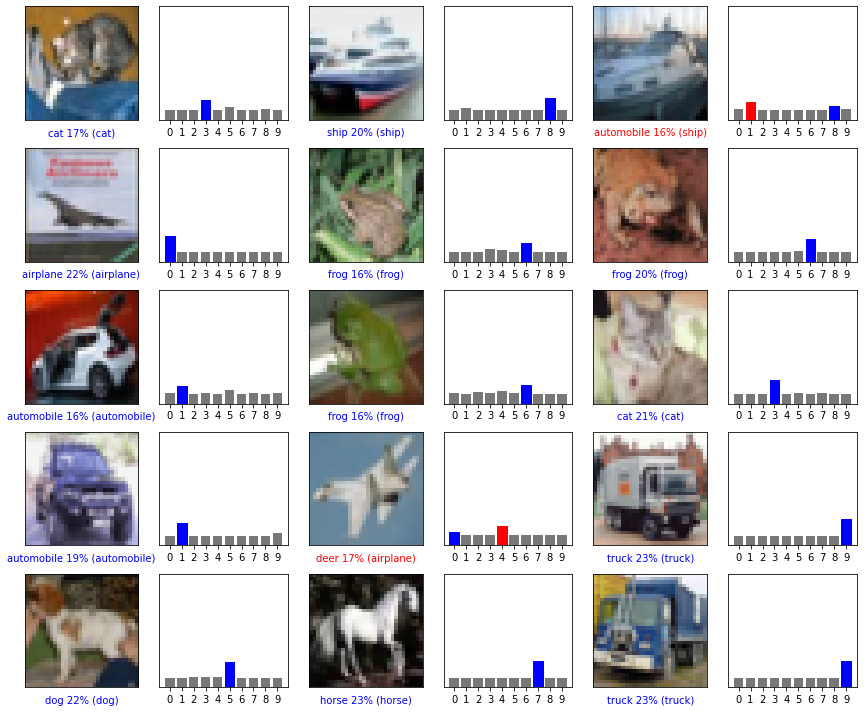

In [36]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()